In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import geopandas as gpd # Geopandas for working with geospatial data
import matplotlib.pyplot as plt # matplotlib to make data vizualation
import matplotlib.dates as mdates
from shapely.geometry import Point, Polygon # Polygon to draw shapes on the map
from datetime import datetime as dt

import folium # Interactive map framework
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/hackathon/data_dir'): # Folder that contains data
    for filename in filenames:
        if 'csv' in filename:
            print(os.path.join(dirname, filename))
            
df = pd.read_csv('/kaggle/input/hackathon/data_dir/dataset.csv')
df.head()

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hackathon/data_dir/dataset.csv


,datetime,app_id,dev_id,time,FixAge,Lat,Lon,SatInFix,TimeActive,altitude,...,boardTemperature,course,imei,lastResetCause,speed,timestamp,waterEC,waterTemperature,pH,name
0,2020-09-14 00:00:22.377,mijnomgeving,357518080163405,1600041622377,27.0,52.372940,4.916176,11.0,19837.0,8.0,...,13.0,253.0,3.575181e+14,32.0,0.0,1.600042e+09,34.0,19.32,NaN,Error: certificate has expired : https://dev.s...
1,2020-09-14 00:00:48.689,mijnomgeving,357518080497423,1600041648689,18.0,52.523019,5.590186,6.0,36035.0,-21.0,...,11.0,50.0,3.575181e+14,32.0,0.0,1.600042e+09,3302.0,16.86,NaN,Error: certificate has expired : https://dev.s...
2,2020-09-14 00:01:21.423,mijnomgeving,357518080203151,1600041681423,2.0,52.420861,4.860095,5.0,4118456.0,6.0,...,13.0,0.0,3.575181e+14,32.0,0.0,1.600042e+09,0.0,0.00,NaN,Error: certificate has expired : https://dev.s...
3,2020-09-14 00:01:27.024,mijnomgeving,357518080328131,1600041687024,20.0,52.391188,4.935864,4.0,9031.0,-100.0,...,13.0,254.0,3.575181e+14,32.0,0.0,1.600042e+09,5180.0,18.53,NaN,Error: certificate has expired : https://dev.s...
4,2020-09-14 00:01:34.856,mijnomgeving,357518080495195,1600041694856,15.0,52.301223,5.360437,7.0,53131.0,3.0,...,10.0,13.0,3.575181e+14,32.0,0.0,1.600042e+09,1676.0,17.74,NaN,Error: certificate has expired : https://dev.s...


Plot the points of 'Lon' and 'Lat' as heatmap on the map

In [33]:
nl_map = folium.Map(location=[52.2129919, 5.2793703], titles='openstreetmap', zoom_starts=8)

df=df.dropna(subset=['Lon'])
df=df.dropna(subset=['Lat'])

HeatMap(data=df[['Lat', 'Lon']], radius=10).add_to(nl_map)

nl_map

In [6]:
normalized_df = df.dropna(subset=['datetime', 'waterEC'])
normalized_df = normalized_df.sort_values(by = ['imei'], ascending=True)

datetimes = []

for row in normalized_df.itertuples(index=True, name='Pandas'):
    datetimes.append((dt.strptime(getattr(row, "datetime"), "%Y-%m-%d %H:%M:%S.%f"), getattr(row, "waterEC"), getattr(row, "imei")))
grouped = normalized_df.groupby(normalized_df['imei'])  

unique_imeis = df.imei.unique()

imeis = {}

# Create dictionary with dataframes of all unique IMEIs
for i in range(len(unique_imeis)):
    imeis[i] = grouped.get_group(unique_imeis[i])

{0:                      datetime        app_id           dev_id           time  \
427   2020-09-14 02:44:52.047  mijnomgeving  357518080163405  1600051492047   
542   2020-09-14 03:30:02.897  mijnomgeving  357518080163405  1600054202897   
350   2020-09-14 02:14:52.352  mijnomgeving  357518080163405  1600049692352   
504   2020-09-14 03:15:07.302  mijnomgeving  357518080163405  1600053307302   
582   2020-09-14 03:44:59.053  mijnomgeving  357518080163405  1600055099053   
...                       ...           ...              ...            ...   
3675  2020-09-14 23:46:22.385  mijnomgeving  357518080163405  1600127182385   
3599  2020-09-14 23:16:16.439  mijnomgeving  357518080163405  1600125376439   
78    2020-09-14 00:29:53.981  mijnomgeving  357518080163405  1600043393981   
3636  2020-09-14 23:31:15.342  mijnomgeving  357518080163405  1600126275342   
156   2020-09-14 00:59:56.083  mijnomgeving  357518080163405  1600045196083   

      FixAge        Lat       Lon  SatInFix  Ti

We can now plot all the waterEC points with matplotlib and then find all the outlying changes in EC with `significant_change()`

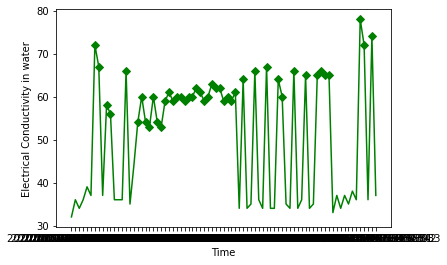

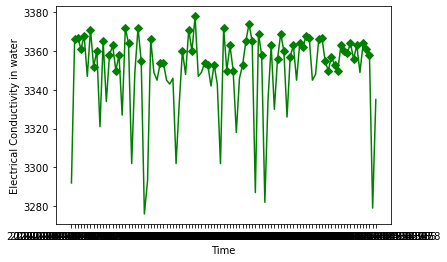

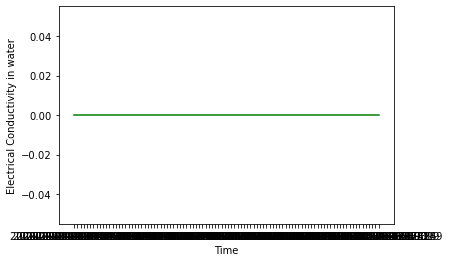

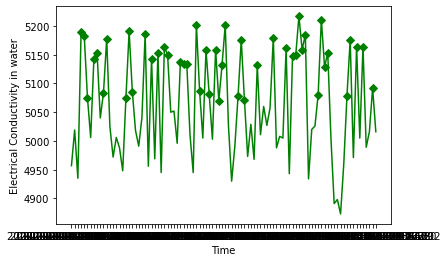

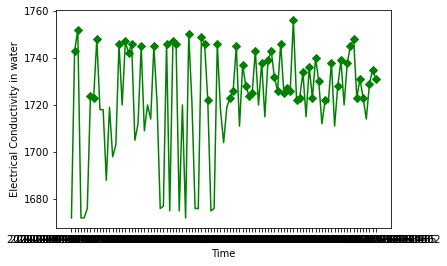

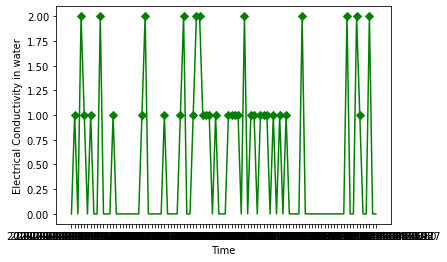

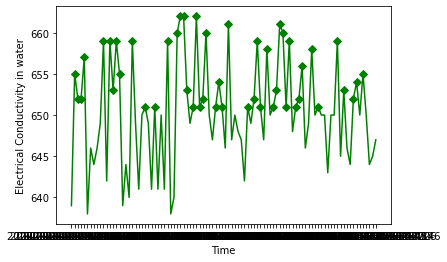

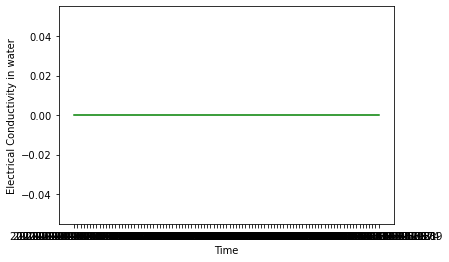

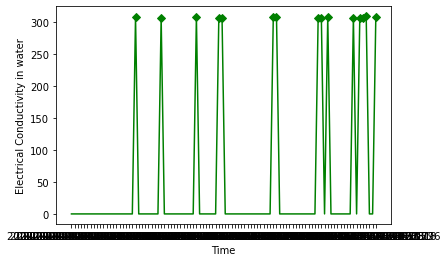

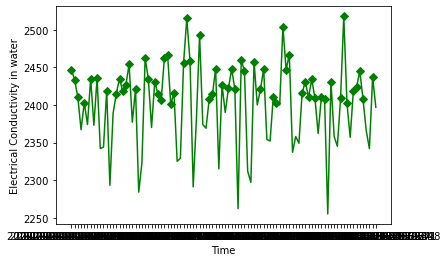

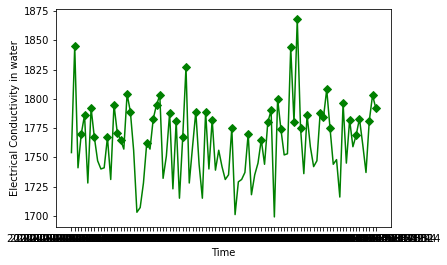

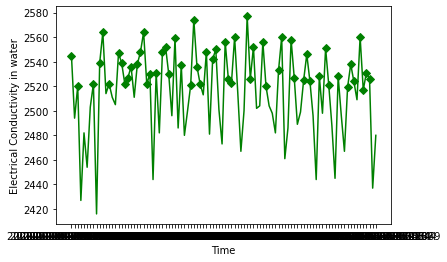

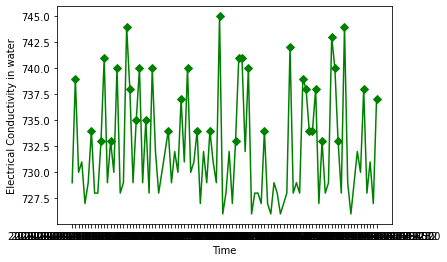

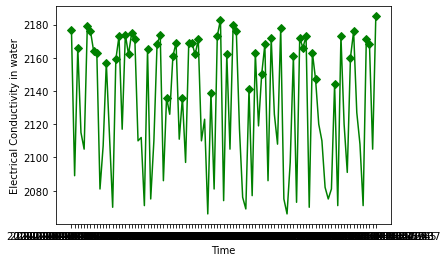

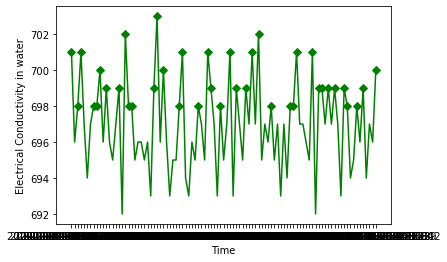

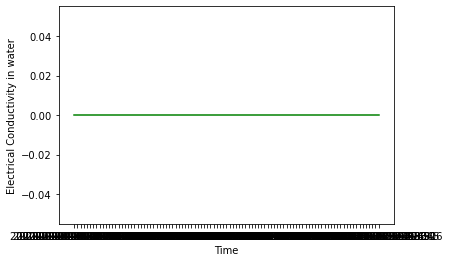

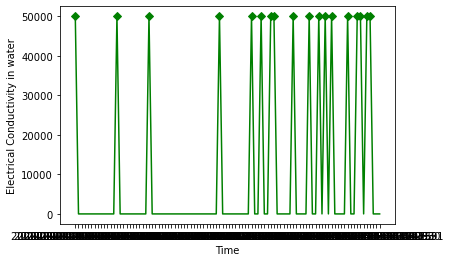

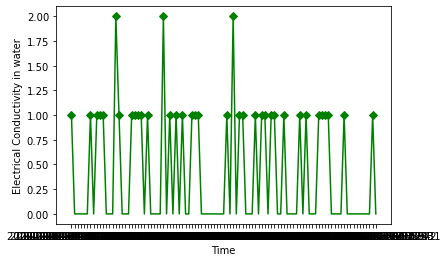

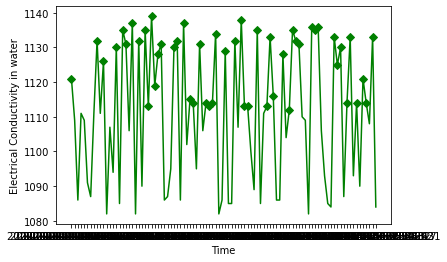

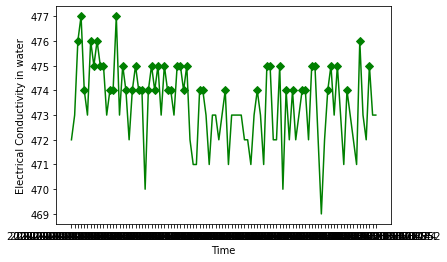

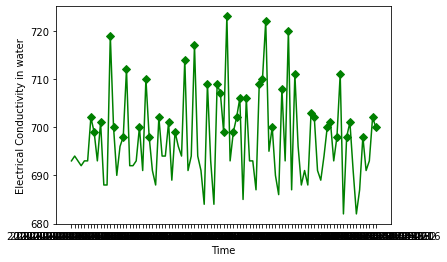

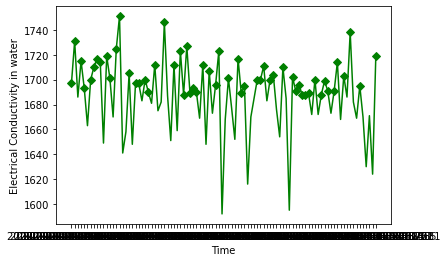

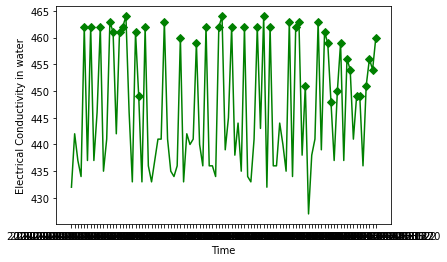

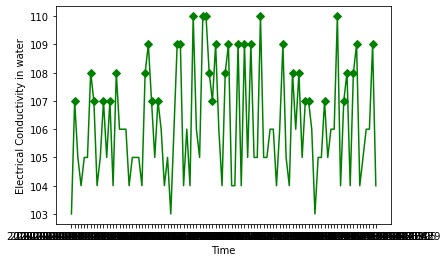

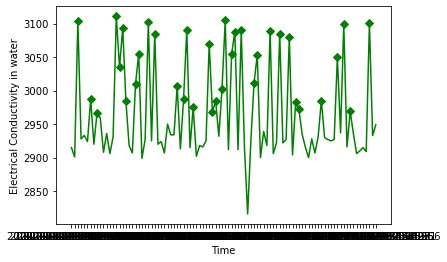

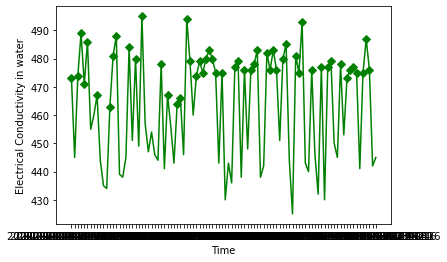

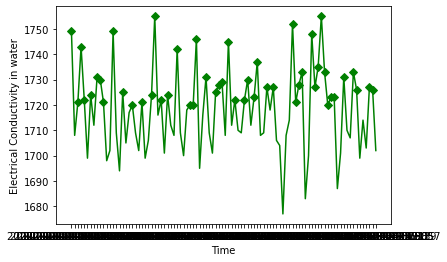

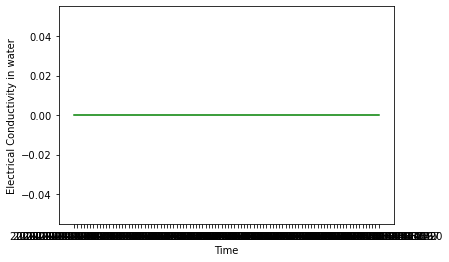

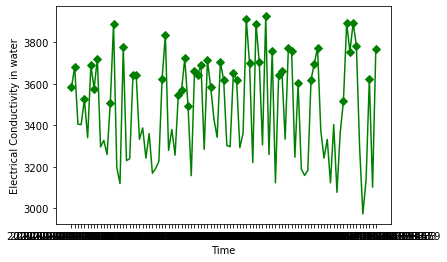

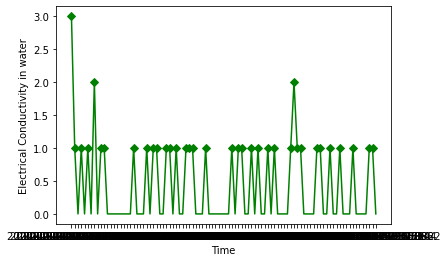

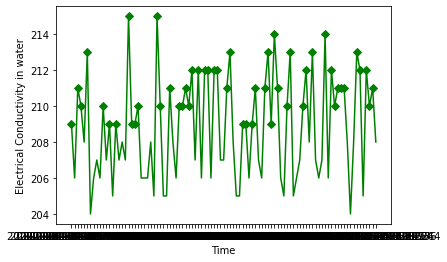

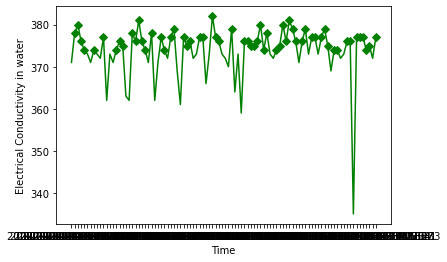

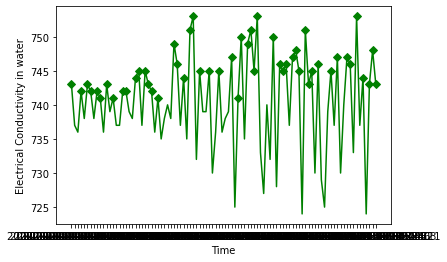

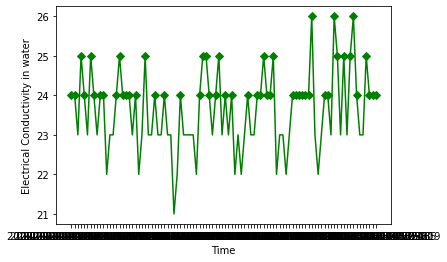

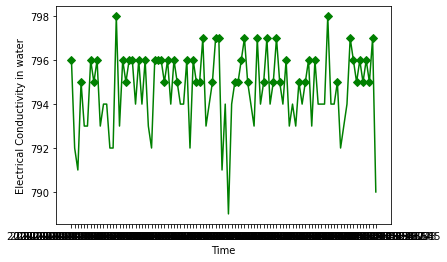

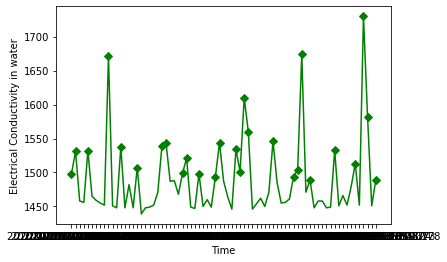

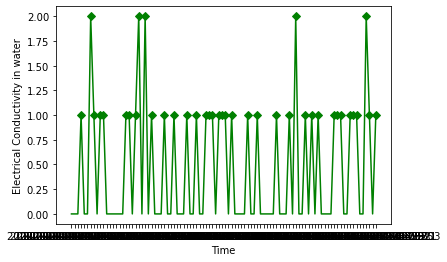

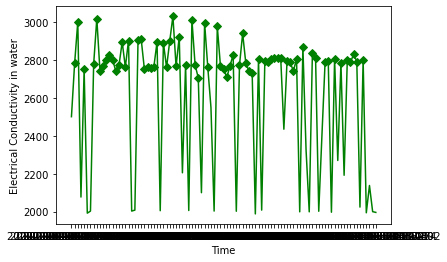

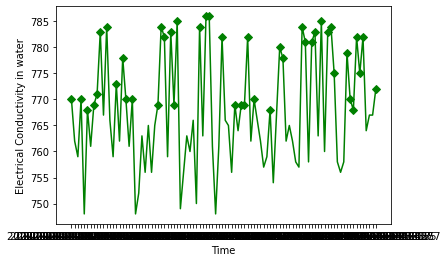

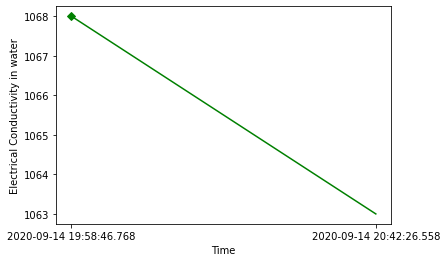

In [12]:
#Check if points are bigger than the mean to estimate the significance of a change
def significant_change(data):
    changes = []
    for idx in range(0, len(data)):
        if (data[idx] > np.mean(data)):
            changes.append(idx)
    return changes

  
for i in range(len(imeis)):
    dates_list = imeis[i].datetime.tolist()
    for date in dates_list:
        date = dt.strptime(date, "%Y-%m-%d %H:%M:%S.%f")
    plt.plot(dates_list, imeis[i].waterEC.tolist(),'-gD', markevery=significant_change(imeis[i].waterEC.tolist()))
    plt.xlabel("Time")
    plt.ylabel("Electrical Conductivity in water")
    s = str(unique_imeis[i])
    s +=".png"
    plt.savefig(s)
    plt.show()